In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from auxiliary import plot_boundary, plot_svm_margins
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Support Vector Machines

----

## SVC en Heart

Para practicar con un dataset real usemos el dataset [**Heart**](https://archive.ics.uci.edu/dataset/45/heart+disease), el cual mediciones de 302 pacientes, con 13 atributos de variables fisiológicas. Además contamos con una columna de valores binarios llamada **target** que nos indica si el paciente tiene una enfermedad coronaria o no.

In [2]:
# Cargamos el dataset
df_heart = pd.read_csv("datasets/Heart.csv")

In [3]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Este dataset en Kaggle tiene un error el cual tiene duplicados muchas veces los mismos valores. Por lo que primero quitemos los duplicados.

In [4]:
df_heart.drop_duplicates(inplace=True)

In [5]:
df_heart.target.value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [6]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Las clases están bastante balanceadas, voy a usar F1-Score como metrica de evaluación

In [7]:
# Hacemos variable dummy a las categoricas
categorical_features = ["cp", "restecg", "slope", "ca", "thal"]

df_heart_dummies = pd.get_dummies(data=df_heart, 
                                  columns=categorical_features, 
                                  drop_first=True)

In [8]:
df_heart_dummies.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
       'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2',
       'thal_3'],
      dtype='object')

---
Trabajemos en el modelo.

Todas las variables son numéricas, por lo que no debemos hacer nada para adaptarlas, mas que normalizarlas. Para este caso vamos a usar todos los atributos.

In [9]:
X = df_heart_dummies.drop(columns='target')
y = df_heart.iloc[:, -1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Vamos a hacer una busqueda de grilla para buscar que modelo se ajustaria mejor.

In [12]:
svm_hearth = SVC()

grid = GridSearchCV(svm_hearth,
                    [{"C": [0.01, 0.1, 1, 5, 10, 100], "kernel": ["linear"]},
                     {"C": [0.01, 0.1, 1, 5, 10, 100], "gamma": [0.1, 0.5, 1, 2, 10, 100], "kernel": ["rbf"]},
                     {"C": [0.01, 0.1, 1, 5, 10, 100], "degree": [2, 3, 4, 5, 6], "kernel": ["poly"]}],
                    refit=True,
                    cv=5,
                    scoring='f1')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 5, 10, 100],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 5, 10, 100],
                          'gamma': [0.1, 0.5, 1, 2, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 5, 10, 100],
                          'degree': [2, 3, 4, 5, 6], 'kernel': ['poly']}],
             scoring='f1')

In [13]:
grid.best_params_

{'C': 5, 'kernel': 'linear'}

Elegido el mejor modelo y entrenado, podemos ver el estado.

In [14]:
svm_hearth_best = grid.best_estimator_

Y podemos ver las diferentes métricas que nos dio con el dataset de testeo.

In [15]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

y_pred = svm_hearth_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"La exactitud de clasificación es: {accuracy}")
print(f"F1-score de testeo fue: {f1}")
print(f"Precisión de testeo fue: {precision}")
print(f"Recall de testeo fue: {recall}")

La exactitud de clasificación es: 0.8571428571428571
F1-score de testeo fue: 0.8602150537634409
Precisión de testeo fue: 0.8
Recall de testeo fue: 0.9302325581395349


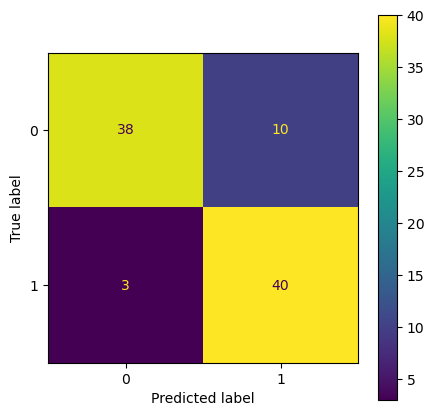

In [16]:
cm = confusion_matrix(y_test, y_pred, labels=svm_hearth_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_hearth_best.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

Algo que podemos hacer con los SVM es obtener la curva ROC.

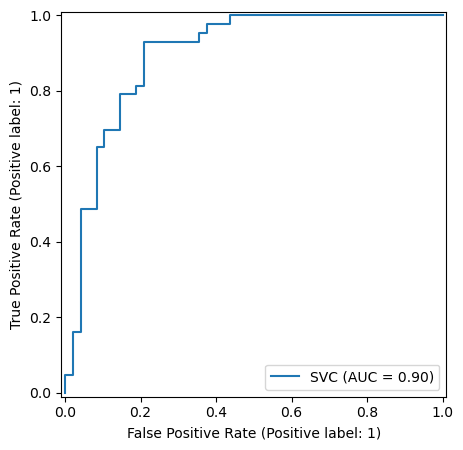

In [17]:
from sklearn.metrics import RocCurveDisplay
    
fig, ax = plt.subplots(figsize=(5,5))
svc_disp = RocCurveDisplay.from_estimator(svm_hearth_best, X_test, y_test, ax=ax)

plt.show()

Como vemos el clasificador SVC para este dataset nos dio un valor bastante alto de AUC (0.90 aprox).
